# Ejercicio de **Clasificaci√≥n Binaria**

Los modelos de clasificacion son modelos que buscan predecir si una observacion pertenece a un determinado grupo o a otro en funcion de sus caracter√≠sticas.

# Importamos las librer√≠¬≠as

In [1]:
import numpy as np
import pandas as pd
import os

## Para regresi√≥n log√≠stica

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Para normalizar los datos

Documentaci√≥n: https://scikit-learn.org/stable/modules/preprocessing.html

In [3]:
from sklearn import preprocessing

## Clasificador KNN

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

## Naive Bayes (con cross-validation)

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

## √Årboles de decisi√≥n

In [1]:
# Importaciones para √°rboles de decisi√≥n
from sklearn import tree
from sklearn.tree import export_graphviz, export_text
from six import StringIO

# Opci√≥n 1: Con pydotplus (para visualizaci√≥n avanzada)
try:
    import pydotplus
    PYDOTPLUS_AVAILABLE = True
    print("‚úÖ pydotplus disponible - Se pueden generar visualizaciones avanzadas")
except ImportError:
    PYDOTPLUS_AVAILABLE = False
    print("‚ö†Ô∏è pydotplus no disponible - Se usar√° visualizaci√≥n b√°sica")

# Opci√≥n 2: Alternativa simple con matplotlib
import matplotlib.pyplot as plt

‚úÖ pydotplus disponible - Se pueden generar visualizaciones avanzadas


## Random Forest

In [2]:
from sklearn.ensemble import RandomForestClassifier

## XGBoost

In [3]:
import xgboost as xgb

## Gr√°ficas personalizadas

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def cuadro_matriz_confusion(confusion):
    fig, ax = plt.subplots()

    labels = ['Verdadero Neg', 'Falso Pos', 'Falso Neg', 'Verdadero Pos']
    categories = ['0', '1']
    counts = ['{0:,}'.format(value) for value in confusion.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in confusion.flatten() / np.sum(confusion)]
    labels = [f'{label}\n{count}\n{percentage}' for label, count, percentage in zip(labels, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories, ax=ax)
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores reales')
    plt.title('Matriz de confusi√≥n')
    plt.show()

## M√©tricas personalizadas

In [5]:
def resumen_metricas(confusion, y_test):
    # Calcular las tasas de precisi√≥n, sensibilidad, especificidad y valor predictivo positivo
    accuracy = (confusion[0, 0] + confusion[1, 1]) / len(y_test)
    recall = confusion[1, 1] / (confusion[1, 1] + confusion[1, 0])
    specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
    ppv = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])

    # Mostrar las tasas de precisi√≥n, sensibilidad, especificidad y valor predictivo positivo
    print("Precisi√≥n (Accuracy):", accuracy)
    print("Sensibilidad (Recall):", recall)
    print("Especificidad:", specificity)
    print("Valor Predictivo Positivo (PPV):", ppv)

# Carga de los datos:

In [8]:
import pandas as pd

data = pd.read_csv(r"C:\Users\Dell\PyhtonIA\Machine Learning\Clasificacion\heart_data.csv")

Para aplicar los modelos es necesario que todos los valores tengan un formato num√©rico
Para ello hacemos las siguientes transformaciones.

El primer paso es conocer nuestros datos.
Realizamos una primera visualizacion.

## Exploraci√≥n y An√°lisis de los datos

In [76]:
data.head(n=10)

index  id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      0   0  18393       2     168    62.0    110     80            1     1   
1      1   1  20228       1     156    85.0    140     90            3     1   
2      2   2  18857       1     165    64.0    130     70            3     1   
3      3   3  17623       2     169    82.0    150    100            1     1   
4      4   4  17474       1     156    56.0    100     60            1     1   
5      5   8  21914       1     151    67.0    120     80            2     2   
6      6   9  22113       1     157    93.0    130     80            3     1   
7      7  12  22584       2     178    95.0    130     90            3     3   
8      8  13  17668       1     158    71.0    110     70            1     1   
9      9  14  19834       1     164    68.0    110     60            1     1   

   smoke  alco  active  cardio  
0      0     0       1       0  
1      0     0       1       1  
2      0     0       0       1  
3      0     0       1       1  
4      0     0       0       0  
5      0     0       0       0  
6      0     0       1       0  
7      0     0       1       1  
8      0     0       1       0  
9      0     0       0       0

In [9]:
# Realizamos un resumen estadistico de las variables.
descripcion_data = data.describe(include="all").T
descripcion_data

count          mean           std      min       25%      50%  \
index        70000.0  34999.500000  20207.403759      0.0  17499.75  34999.5   
id           70000.0  49972.419900  28851.302323      0.0  25006.75  50001.5   
age          70000.0  19468.865814   2467.251667  10798.0  17664.00  19703.0   
gender       70000.0      1.349571      0.476838      1.0      1.00      1.0   
height       70000.0    164.359229      8.210126     55.0    159.00    165.0   
weight       70000.0     74.205690     14.395757     10.0     65.00     72.0   
ap_hi        70000.0    128.817286    154.011419   -150.0    120.00    120.0   
ap_lo        70000.0     96.630414    188.472530    -70.0     80.00     80.0   
cholesterol  70000.0      1.366871      0.680250      1.0      1.00      1.0   
gluc         70000.0      1.226457      0.572270      1.0      1.00      1.0   
smoke        70000.0      0.088129      0.283484      0.0      0.00      0.0   
alco         70000.0      0.053771      0.225568      0.0      0.00      0.0   
active       70000.0      0.803729      0.397179      0.0      1.00      1.0   
cardio       70000.0      0.499700      0.500003      0.0      0.00      0.0   

                  75%      max  
index        52499.25  69999.0  
id           74889.25  99999.0  
age          21327.00  23713.0  
gender           2.00      2.0  
height         170.00    250.0  
weight          82.00    200.0  
ap_hi          140.00  16020.0  
ap_lo           90.00  11000.0  
cholesterol      2.00      3.0  
gluc             1.00      3.0  
smoke            0.00      1.0  
alco             0.00      1.0  
active           1.00      1.0  
cardio           1.00      1.0

In [10]:
# Comprobamos que no hay valores perdidos.
data.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
# Con esta funcion vemos si existen (TRUE) o no (FALSE) datos perdidos
data.isnull().any().any()

np.False_

## Balanceo de la columna objetivo

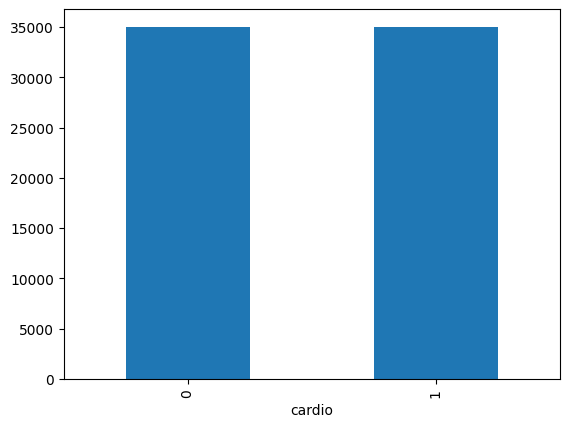

In [12]:
data["cardio"].value_counts().plot(kind = "bar");

In [13]:
# Tras comprobar que no existen valores perdidos analizamos las variables.
# El objetivo es determinar si todas las variables son utiles para la modelizacion.
# Hay una serie de variables que no nos proporcionan informacion.
# Eliminamos esas variables
del data['index']
del data['id']

In [14]:
# La variable "gender" toma valores 1 y 2. La reducimos en una unidad para que tome 0 y 1
data["gender"] = data["gender"] - 1

In [15]:
# Volvemos a visualizar los datos.
data.head(n=10)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       1     168    62.0    110     80            1     1      0   
1  20228       0     156    85.0    140     90            3     1      0   
2  18857       0     165    64.0    130     70            3     1      0   
3  17623       1     169    82.0    150    100            1     1      0   
4  17474       0     156    56.0    100     60            1     1      0   
5  21914       0     151    67.0    120     80            2     2      0   
6  22113       0     157    93.0    130     80            3     1      0   
7  22584       1     178    95.0    130     90            3     3      0   
8  17668       0     158    71.0    110     70            1     1      0   
9  19834       0     164    68.0    110     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
5     0       0       0  
6     0       1       0  
7     0       1       1  
8     0       1       0  
9     0       0       0

Vemos los valores √∫nicos de las columnas categ√≥ricas (Las que tienen menos de, por ejemplo, 15 valores √∫nicos)

In [16]:
for columna in data.columns:
    if len(data[columna].unique()) < 15:
        print(f"Columna {columna} -> Valores √∫nicos {data[columna].unique()}")

Columna gender -> Valores √∫nicos [1 0]
Columna cholesterol -> Valores √∫nicos [1 3 2]
Columna gluc -> Valores √∫nicos [1 2 3]
Columna smoke -> Valores √∫nicos [0 1]
Columna alco -> Valores √∫nicos [0 1]
Columna active -> Valores √∫nicos [1 0]
Columna cardio -> Valores √∫nicos [0 1]


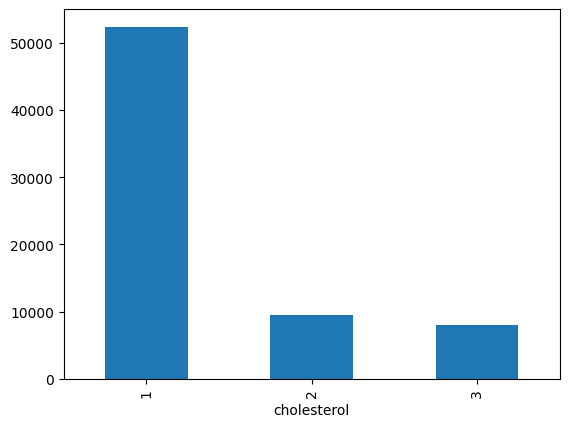

In [17]:
data['cholesterol'].value_counts().plot(kind = "bar");
# Cambio posible
# data['cholesterol'] = data['cholesterol'] != 1

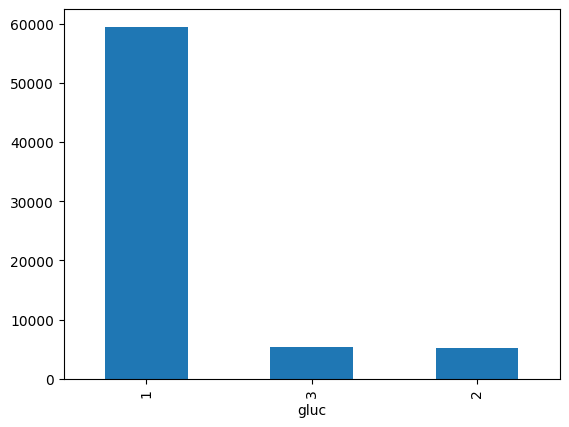

In [18]:
data['gluc'].value_counts().plot(kind = "bar");
# Cambio posible
# data['gluc'] = data['gluc'] != 1

Posteriormente podemos considerar la opci√≥n de dumificar o no las columnas `cholesterol`y `gluc`

Ya no hacemos m√°s limpieza en este caso. En este punto lo consideramos "datosfinal"

In [19]:
datos_final = data

## Outliers

### Presi√≥n alta

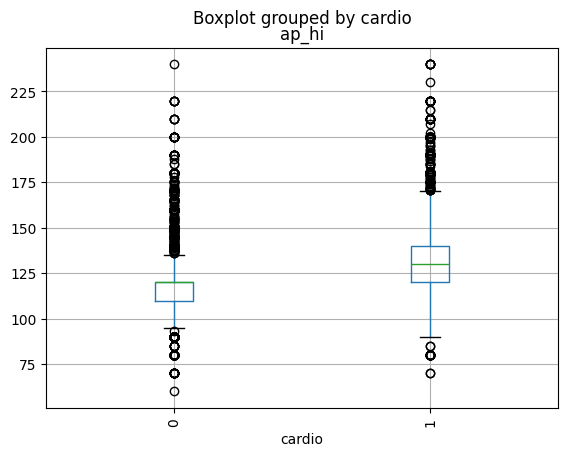

In [20]:
data = data[(data["ap_hi"]<300) & (data["ap_hi"]>50)]
data.boxplot(column="ap_hi", by="cardio", ax=None, fontsize=None, rot=90, grid=True);


### Presi√≥n baja

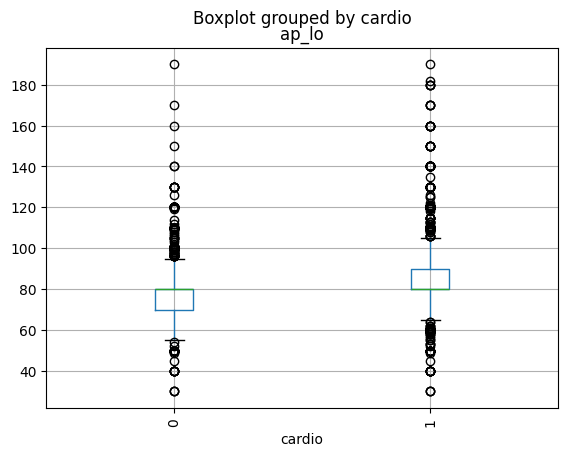

In [21]:
data = data[(data["ap_lo"]<250) & (data["ap_lo"]>25)]
data.boxplot(column="ap_lo", by="cardio", ax=None, fontsize=None, rot=90, grid=True);

In [22]:
data['ap_lo'].value_counts().head(20)

ap_lo
80     34736
90     14269
70     10218
100     4077
60      2716
110      398
79       357
85       290
75       210
120      204
95       161
89       122
69       100
65        78
50        56
130       35
82        33
84        32
83        30
140       30
Name: count, dtype: int64

<Axes: title={'center': 'Distribucion de la Tensi√≥n arterial'}, ylabel='Density'>

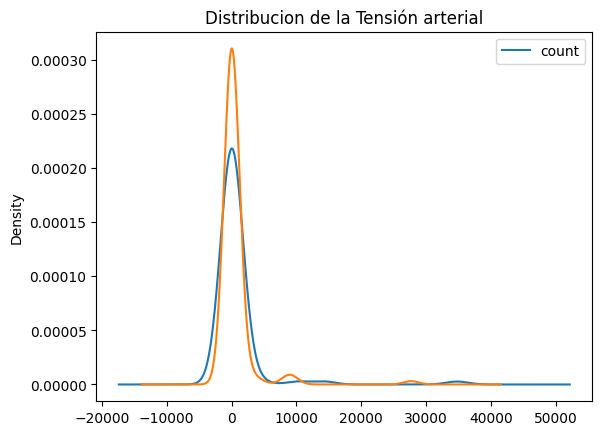

In [24]:
data['ap_lo'].value_counts().sort_index().plot(x='Presi√≥n arterial baja',y='frecuencia',
                                           kind='kde', legend=True,title='Distribucion de la Tensi√≥n arterial')
data['ap_hi'].value_counts().sort_index().plot(x='Presi√≥n arterial alta',y='frecuencia',
                                           kind='kde')

### Alturas An√≥malas

Vemos que las personas con altura menor de 125cm tienen pesos exagerados para esa altura. Probablemente se trate de errores en los datos.

In [25]:
data.loc[data["height"]<125, ["height", "weight"]]

height  weight
224        76    55.0
3420      100    70.0
3735      120    70.0
3752      120    30.0
4212      120    80.0
...       ...     ...
65302      99    60.0
66023     120    80.0
66479     110    90.0
66643      57    61.0
69052     120    80.0

[83 rows x 2 columns]

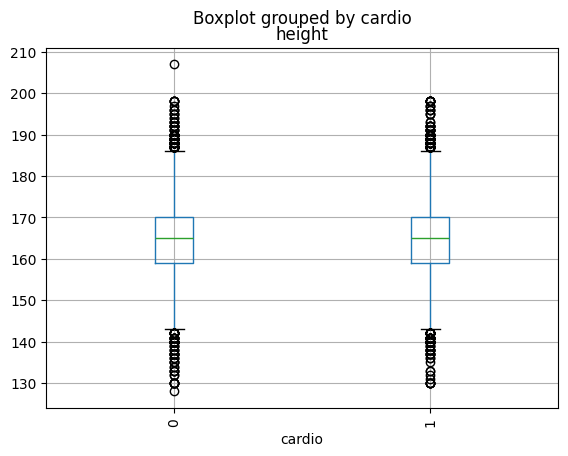

In [26]:
data = data[(data["height"]<220) & (data["height"]>125)]
data.boxplot(column="height", by="cardio", ax=None, fontsize=None, rot=90, grid=True);

### Body Mass Index an√≥malos

In [27]:
data["BMI"] = (10000 * data["weight"]) / (data["height"] **2)

In [95]:
#data = data[data["BMI"]<90]
data = data[data["BMI"]>14]
data.boxplot(column="BMI", by="cardio", ax=None, fontsize=None, rot=90, grid=True);

In [28]:
max(data['BMI'])

85.77974319356386

In [97]:
data['BMI'].plot(kind='hist', legend=True, title='√çndice de Masa Corporal')

# Ajusta los l√≠mites del eje X
plt.xlim(10, 86)

# Configura etiquetas y muestra el gr√°fico
plt.xlabel('√çndice de Masa Corporal')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

In [29]:
data.loc[data["weight"]<40, ["height", "weight", "age", "BMI"]]

height  weight    age        BMI
5794      151   37.00  17663  16.227358
10447     162   38.00  22007  14.479500
10627     153   37.00  21669  15.805887
11876     157   39.00  17512  15.822143
14722     143   34.00  22663  16.626730
16322     165   35.00  21872  12.855831
16906     170   31.00  17272  10.726644
18559     160   30.00  18140  11.718750
19582     152   38.00  21334  16.447368
22016     146   32.00  15359  15.012197
25198     149   35.45  18768  15.967749
26806     157   23.00  23284   9.331007
29333     153   37.00  21728  15.805887
29488     177   22.00  20408   7.022248
31420     140   39.00  20575  19.897959
32087     143   36.00  15747  17.604773
33478     152   39.00  15493  16.880194
33511     153   34.00  21081  14.524328
33817     178   11.00  21582   3.471784
33820     145   36.00  22571  17.122473
34276     128   28.00  14664  17.089844
34282     148   36.00  20406  16.435354
34328     152   39.00  14670  16.880194
35314     146   32.00  19802  15.012197
38417     154   32.00  21809  13.493001
40612     154   38.00  23202  16.022938
41353     157   38.00  20892  15.416447
41905     143   30.00  21334  14.670644
43759     135   37.00  18050  20.301783
44138     151   38.00  21828  16.665936
44622     150   39.00  18240  17.333333
48080     143   33.00  19255  16.137708
48613     144   36.00  20452  17.361111
51411     155   37.00  21115  15.400624
51544     151   38.00  21989  16.665936
51837     139   34.00  19817  17.597433
53224     133   36.00  20396  20.351631
53945     156   39.00  22637  16.025641
54017     134   37.00  22564  20.605926
54682     153   39.00  20479  16.660259
55339     147   39.00  23562  18.048036
55852     152   34.00  23370  14.716066
56914     152   37.00  18980  16.014543
58200     169   35.00  22544  12.254473
60188     162   21.00  21855   8.001829
60699     171   29.00  18875   9.917581
63113     158   39.00  20406  15.622496
65650     147   38.00  19114  17.585265

In [30]:
data.boxplot(column="weight", by="cardio", ax=None, fontsize=None, rot=90, grid=True);


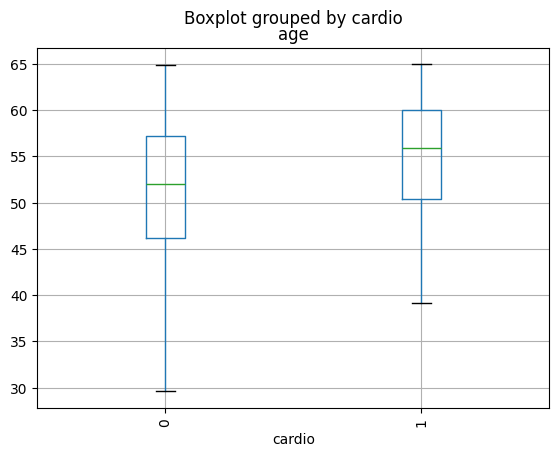

In [31]:
data2 = data
data2["age"] = data2["age"]/365
data2.boxplot(column="age", by="cardio", ax=None, fontsize=None, rot=90, grid=True);

In [32]:
datos_final = data

In [102]:
datos_final = datos_final.reset_index()
datos_final.index

RangeIndex(start=0, stop=68682, step=1)

# Correlaci√≥n

In [33]:
datos_final.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI'],
      dtype='object')

In [47]:
# Verificar las columnas actuales de datos_final
print("Columnas actuales de datos_final:")
print(datos_final.columns.tolist())
print("\nForma del DataFrame:", datos_final.shape)

Columnas actuales de datos_final:
['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI']

Forma del DataFrame: (68693, 13)


In [48]:
# Preparar datos para KNN - eliminando columnas innecesarias de forma segura
datos_knn = datos_final.copy()

# Eliminar columnas de forma segura (solo si existen)
columnas_a_eliminar = ['index', 'weight', 'height', 'ap_lo']
for col in columnas_a_eliminar:
    if col in datos_knn.columns:
        datos_knn = datos_knn.drop(columns=col)
        print(f"Columna '{col}' eliminada")
    else:
        print(f"Columna '{col}' no encontrada, continuando...")

print(f"\nColumnas finales para KNN: {datos_knn.columns.tolist()}")
print(f"Forma del DataFrame: {datos_knn.shape}")

# Separar caracter√≠sticas y variable objetivo
X_knn = datos_knn.drop('cardio', axis=1)
y_knn = datos_knn['cardio']

# Dividir datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Normalizar los datos para KNN
from sklearn.preprocessing import StandardScaler
scaler_knn = StandardScaler()
X_train_knn_scaled = scaler_knn.fit_transform(X_train_knn)
X_test_knn_scaled = scaler_knn.transform(X_test_knn)

# Crear y entrenar el modelo KNN
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_knn_scaled, y_train_knn)

# Hacer predicciones
y_pred_knn = modelo_knn.predict(X_test_knn_scaled)

# Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print(f"\nPrecisi√≥n del modelo KNN: {accuracy_knn:.4f}")

# Reporte de clasificaci√≥n
print("\nReporte de clasificaci√≥n KNN:")
print(classification_report(y_test_knn, y_pred_knn))

# Matriz de confusi√≥n
confusion_knn = confusion_matrix(y_test_knn, y_pred_knn)
print("\nMatriz de confusi√≥n KNN:")
print(confusion_knn)

Columna 'index' no encontrada, continuando...
Columna 'weight' eliminada
Columna 'height' eliminada
Columna 'ap_lo' eliminada

Columnas finales para KNN: ['age', 'gender', 'ap_hi', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI']
Forma del DataFrame: (68693, 10)

Precisi√≥n del modelo KNN: 0.6965

Reporte de clasificaci√≥n KNN:
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      6944
           1       0.70      0.68      0.69      6795

    accuracy                           0.70     13739
   macro avg       0.70      0.70      0.70     13739
weighted avg       0.70      0.70      0.70     13739


Matriz de confusi√≥n KNN:
[[4981 1963]
 [2207 4588]]

Precisi√≥n del modelo KNN: 0.6965

Reporte de clasificaci√≥n KNN:
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      6944
           1       0.70      0.68      0.69      6795

    accuracy                           0

<Axes: >

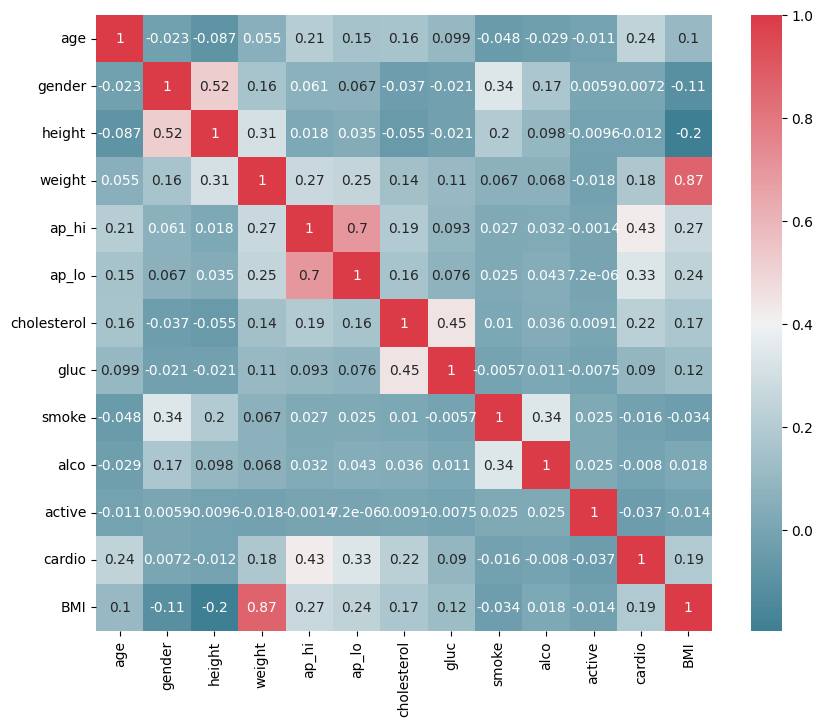

In [35]:
import numpy as np

f, ax = plt.subplots(figsize=(10, 8))
corr = datos_final.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

## Separaci√≥n Train - Test

Vamos a preparar los datos para entrenar y evaluar los modelos utilizando la biblioteca scikit-learn (sklearn) en Python.

Aqu√≠ es lo que est√° haciendo cada l√≠nea:

La funci√≥n `train_test_split` se utiliza para dividir los datos en conjuntos de entrenamiento y prueba de manera aleatoria.

Podr√≠a ser que las condiciones de medida de los registros de mi dataset fueran distintos en la parte baja de la tabla a las condiciones en la parte alta.

Por ello es conveniente "barajar" aleatoriamente las filas.

`random_state=42`: establece una semilla aleatoria para garantizar la reproducibilidad de la divisi√≥n de los datos

In [37]:
from sklearn.model_selection import train_test_split
y = datos_final['cardio']
X = datos_final.drop('cardio', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
# üîß VERIFICACI√ìN E IMPORTACI√ìN DE LIBRER√çAS NECESARIAS
print("="*60)
print("üîß VERIFICANDO E IMPORTANDO LIBRER√çAS NECESARIAS")
print("="*60)

# Importaciones b√°sicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importaciones de sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_text

# Importaci√≥n de XGBoost
import xgboost as xgb

# Verificar que las funciones personalizadas est√©n definidas
try:
    # Redefinir funci√≥n de matriz de confusi√≥n si no existe
    def cuadro_matriz_confusion(confusion):
        fig, ax = plt.subplots()
        labels = ['Verdadero Neg', 'Falso Pos', 'Falso Neg', 'Verdadero Pos']
        categories = ['0', '1']
        counts = ['{0:,}'.format(value) for value in confusion.flatten()]
        percentages = ['{0:.2%}'.format(value) for value in confusion.flatten() / np.sum(confusion)]
        labels = [f'{label}\n{count}\n{percentage}' for label, count, percentage in zip(labels, counts, percentages)]
        labels = np.asarray(labels).reshape(2, 2)
        sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories, ax=ax)
        plt.xlabel('Valores predichos')
        plt.ylabel('Valores reales')
        plt.title('Matriz de confusi√≥n')
        plt.show()
    
    # Redefinir funci√≥n de m√©tricas si no existe
    def resumen_metricas(confusion, y_test):
        accuracy = (confusion[0, 0] + confusion[1, 1]) / len(y_test)
        recall = confusion[1, 1] / (confusion[1, 1] + confusion[1, 0])
        specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
        ppv = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])
        print("Precisi√≥n (Accuracy):", accuracy)
        print("Sensibilidad (Recall):", recall)
        print("Especificidad:", specificity)
        print("Valor Predictivo Positivo (PPV):", ppv)
    
    print("‚úÖ Funciones personalizadas definidas")
except:
    print("‚ö†Ô∏è Error al definir funciones personalizadas")

# Verificar que las variables de datos existan
try:
    print(f"‚úÖ X_train shape: {X_train.shape}")
    print(f"‚úÖ X_test shape: {X_test.shape}")
    print(f"‚úÖ y_train shape: {y_train.shape}")
    print(f"‚úÖ y_test shape: {y_test.shape}")
except NameError:
    print("‚ùå Las variables de entrenamiento y prueba no est√°n definidas.")
    print("‚ö†Ô∏è Debes ejecutar las celdas de preparaci√≥n de datos primero.")

print("\nüöÄ Todas las librer√≠as importadas correctamente. Listo para entrenar modelos!")
print("="*60)

üîß VERIFICANDO E IMPORTANDO LIBRER√çAS NECESARIAS
‚úÖ Funciones personalizadas definidas
‚úÖ X_train shape: (51519, 12)
‚úÖ X_test shape: (17174, 12)
‚úÖ y_train shape: (51519,)
‚úÖ y_test shape: (17174,)

üöÄ Todas las librer√≠as importadas correctamente. Listo para entrenar modelos!


#   Regresi√≥n Log√≠stica

El primer modelo de calsificacion es la regresion logistica. Este modelo es una regresion que mide la probabilidad de que una observacion tome el valor 0 o 1. (Verdadero o falso, acierto o error...)

üî¥ ENTRENANDO MODELO DE REGRESI√ìN LOG√çSTICA
‚úÖ Modelo de Regresi√≥n Log√≠stica entrenado
Precisi√≥n del modelo: 0.7250

Matriz de Confusi√≥n - Regresi√≥n Log√≠stica:
‚úÖ Modelo de Regresi√≥n Log√≠stica entrenado
Precisi√≥n del modelo: 0.7250

Matriz de Confusi√≥n - Regresi√≥n Log√≠stica:


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


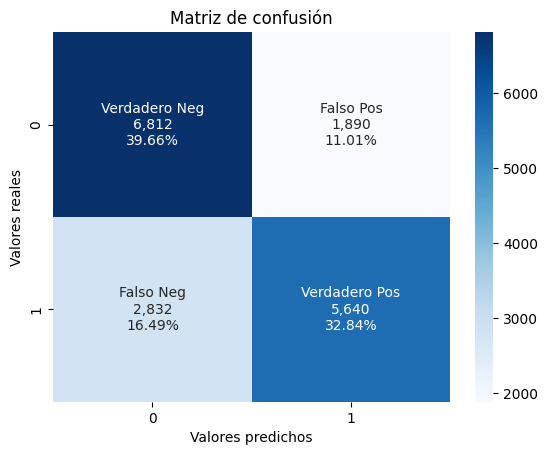


üìä M√âTRICAS DETALLADAS - REGRESI√ìN LOG√çSTICA:
Precisi√≥n (Accuracy): 0.7250494934202865
Sensibilidad (Recall): 0.6657223796033994
Especificidad: 0.7828085497586762
Valor Predictivo Positivo (PPV): 0.749003984063745


In [41]:
# üî¥ MODELO 1: REGRESI√ìN LOG√çSTICA
print("="*60)
print("üî¥ ENTRENANDO MODELO DE REGRESI√ìN LOG√çSTICA")
print("="*60)

# Crear el modelo de regresi√≥n log√≠stica
modelo_logistico = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar el modelo
modelo_logistico.fit(X_train, y_train)

# Realizar predicciones
y_pred_logistico = modelo_logistico.predict(X_test)

# Calcular la matriz de confusi√≥n
confusion_logistico = confusion_matrix(y_test, y_pred_logistico)

print("‚úÖ Modelo de Regresi√≥n Log√≠stica entrenado")
print(f"Precisi√≥n del modelo: {accuracy_score(y_test, y_pred_logistico):.4f}")
print()

# Mostrar matriz de confusi√≥n
print("Matriz de Confusi√≥n - Regresi√≥n Log√≠stica:")
cuadro_matriz_confusion(confusion_logistico)

# Mostrar m√©tricas detalladas
print("\nüìä M√âTRICAS DETALLADAS - REGRESI√ìN LOG√çSTICA:")
resumen_metricas(confusion_logistico, y_test)

# K Nearest Neighbours

In [ ]:
# üîµ MODELO 2: K-NEAREST NEIGHBORS (KNN)
print("="*60)
print("üîµ ENTRENANDO MODELO K-NEAREST NEIGHBORS")
print("="*60)

# Crear el modelo KNN con k=5 vecinos
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
modelo_knn.fit(X_train, y_train)

# Realizar predicciones
y_pred_knn = modelo_knn.predict(X_test)

# Calcular la matriz de confusi√≥n
confusion_knn = confusion_matrix(y_test, y_pred_knn)

print("‚úÖ Modelo K-Nearest Neighbors entrenado")
print(f"N√∫mero de vecinos (k): {modelo_knn.n_neighbors}")
print(f"Precisi√≥n del modelo: {accuracy_score(y_test, y_pred_knn):.4f}")
print()

# Mostrar matriz de confusi√≥n
print("Matriz de Confusi√≥n - K-Nearest Neighbors:")
cuadro_matriz_confusion(confusion_knn)

# Mostrar m√©tricas detalladas
print("\nüìä M√âTRICAS DETALLADAS - K-NEAREST NEIGHBORS:")
resumen_metricas(confusion_knn, y_test)

# Na√Øve Bayes

üü° ENTRENANDO MODELO NA√èVE BAYES
‚úÖ Modelo Na√Øve Bayes entrenado
Precisi√≥n del modelo: 0.7029

üîÑ VALIDACI√ìN CRUZADA (5-Fold):
Puntuaciones CV: [0.70623059 0.70982143 0.70797748 0.70768634 0.69931088]
Precisi√≥n promedio CV: 0.7062 (+/- 0.0073)

Matriz de Confusi√≥n - Na√Øve Bayes:


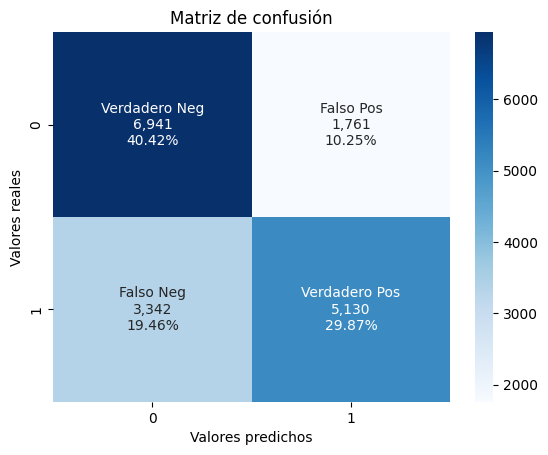


üìä M√âTRICAS DETALLADAS - NA√èVE BAYES:
Precisi√≥n (Accuracy): 0.702864795621288
Sensibilidad (Recall): 0.6055240793201133
Especificidad: 0.7976327281084808
Valor Predictivo Positivo (PPV): 0.7444492816717457


In [42]:
# üü° MODELO 3: NA√èVE BAYES
print("="*60)
print("üü° ENTRENANDO MODELO NA√èVE BAYES")
print("="*60)

# Crear el modelo Na√Øve Bayes
modelo_nb = GaussianNB()

# Entrenar el modelo
modelo_nb.fit(X_train, y_train)

# Realizar predicciones
y_pred_nb = modelo_nb.predict(X_test)

# Calcular la matriz de confusi√≥n
confusion_nb = confusion_matrix(y_test, y_pred_nb)

print("‚úÖ Modelo Na√Øve Bayes entrenado")
print(f"Precisi√≥n del modelo: {accuracy_score(y_test, y_pred_nb):.4f}")

# Validaci√≥n cruzada (Cross-Validation)
print("\nüîÑ VALIDACI√ìN CRUZADA (5-Fold):")
cv_scores = cross_val_score(modelo_nb, X_train, y_train, cv=5)
print(f"Puntuaciones CV: {cv_scores}")
print(f"Precisi√≥n promedio CV: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print()

# Mostrar matriz de confusi√≥n
print("Matriz de Confusi√≥n - Na√Øve Bayes:")
cuadro_matriz_confusion(confusion_nb)

# Mostrar m√©tricas detalladas
print("\nüìä M√âTRICAS DETALLADAS - NA√èVE BAYES:")
resumen_metricas(confusion_nb, y_test)

# √Årbol de decisi√≥n

üü¢ ENTRENANDO MODELO √ÅRBOL DE DECISI√ìN
‚úÖ Modelo √Årbol de Decisi√≥n entrenado
Profundidad del √°rbol: 5
N√∫mero de hojas: 31
Precisi√≥n del modelo: 0.7289

Matriz de Confusi√≥n - √Årbol de Decisi√≥n:


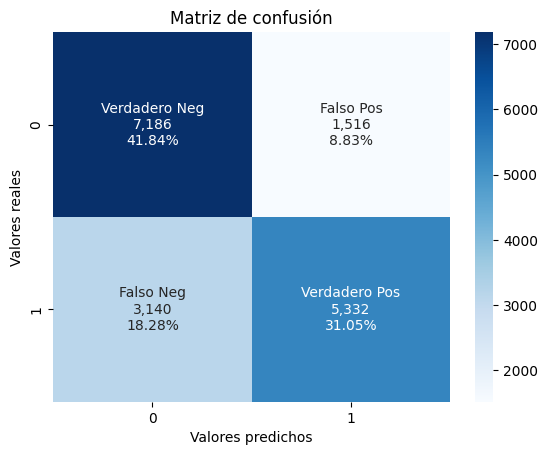


üìä M√âTRICAS DETALLADAS - √ÅRBOL DE DECISI√ìN:
Precisi√≥n (Accuracy): 0.7288925119366484
Sensibilidad (Recall): 0.6293673276676109
Especificidad: 0.8257871753619858
Valor Predictivo Positivo (PPV): 0.7786214953271028

üå≥ IMPORTANCIA DE LAS CARACTER√çSTICAS:
   Caracter√≠stica  Importancia
4           ap_hi     0.786079
0             age     0.120672
6     cholesterol     0.075008
7            gluc     0.005786
11            BMI     0.004886
5           ap_lo     0.004649
10         active     0.001465
2          height     0.000796
8           smoke     0.000659
1          gender     0.000000

üìÑ ESTRUCTURA DEL √ÅRBOL (primeras reglas):
|--- ap_hi <= 129.50
|   |--- age <= 54.65
|   |   |--- cholesterol <= 2.50
|   |   |   |--- age <= 44.11
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- age >  44.11
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- cholesterol >  2.50
|   |   |   |--- gluc <= 2.50
|   |   |   |   |--- truncated branch of depth 2
| 

In [43]:
# üü¢ MODELO 4: √ÅRBOL DE DECISI√ìN
print("="*60)
print("üü¢ ENTRENANDO MODELO √ÅRBOL DE DECISI√ìN")
print("="*60)

# Crear el modelo de √°rbol de decisi√≥n
modelo_arbol = tree.DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # Limitamos la profundidad para evitar overfitting
    min_samples_split=20,
    min_samples_leaf=10
)

# Entrenar el modelo
modelo_arbol.fit(X_train, y_train)

# Realizar predicciones
y_pred_arbol = modelo_arbol.predict(X_test)

# Calcular la matriz de confusi√≥n
confusion_arbol = confusion_matrix(y_test, y_pred_arbol)

print("‚úÖ Modelo √Årbol de Decisi√≥n entrenado")
print(f"Profundidad del √°rbol: {modelo_arbol.get_depth()}")
print(f"N√∫mero de hojas: {modelo_arbol.get_n_leaves()}")
print(f"Precisi√≥n del modelo: {accuracy_score(y_test, y_pred_arbol):.4f}")
print()

# Mostrar matriz de confusi√≥n
print("Matriz de Confusi√≥n - √Årbol de Decisi√≥n:")
cuadro_matriz_confusion(confusion_arbol)

# Mostrar m√©tricas detalladas
print("\nüìä M√âTRICAS DETALLADAS - √ÅRBOL DE DECISI√ìN:")
resumen_metricas(confusion_arbol, y_test)

# Mostrar importancia de las caracter√≠sticas
print("\nüå≥ IMPORTANCIA DE LAS CARACTER√çSTICAS:")
feature_importance = pd.DataFrame({
    'Caracter√≠stica': X.columns,
    'Importancia': modelo_arbol.feature_importances_
}).sort_values('Importancia', ascending=False)

print(feature_importance.head(10))

# Visualizaci√≥n simple del √°rbol (texto)
print("\nüìÑ ESTRUCTURA DEL √ÅRBOL (primeras reglas):")
tree_rules = export_text(modelo_arbol, feature_names=list(X.columns), max_depth=3)
print(tree_rules[:1000] + "..." if len(tree_rules) > 1000 else tree_rules)

# XGBoost

In [44]:
# üü£ MODELO 5: XGBOOST
print("="*60)
print("üü£ ENTRENANDO MODELO XGBOOST")
print("="*60)

# Crear el modelo XGBoost
modelo_xgb = xgb.XGBClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='logloss'  # Para evitar warnings
)

# Entrenar el modelo
modelo_xgb.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = modelo_xgb.predict(X_test)

# Calcular la matriz de confusi√≥n
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)

print("‚úÖ Modelo XGBoost entrenado")
print(f"N√∫mero de estimadores: {modelo_xgb.n_estimators}")
print(f"Profundidad m√°xima: {modelo_xgb.max_depth}")
print(f"Precisi√≥n del modelo: {accuracy_score(y_test, y_pred_xgb):.4f}")
print()

# Mostrar matriz de confusi√≥n
print("Matriz de Confusi√≥n - XGBoost:")
cuadro_matriz_confusion(confusion_xgb)

# Mostrar m√©tricas detalladas
print("\nüìä M√âTRICAS DETALLADAS - XGBOOST:")
resumen_metricas(confusion_xgb, y_test)

# Mostrar importancia de las caracter√≠sticas
print("\nüöÄ IMPORTANCIA DE LAS CARACTER√çSTICAS (XGBoost):")
feature_importance_xgb = pd.DataFrame({
    'Caracter√≠stica': X.columns,
    'Importancia': modelo_xgb.feature_importances_
}).sort_values('Importancia', ascending=False)

print(feature_importance_xgb.head(10))

üü£ ENTRENANDO MODELO XGBOOST
‚úÖ Modelo XGBoost entrenado
N√∫mero de estimadores: 100
Profundidad m√°xima: 6
Precisi√≥n del modelo: 0.7337

Matriz de Confusi√≥n - XGBoost:
‚úÖ Modelo XGBoost entrenado
N√∫mero de estimadores: 100
Profundidad m√°xima: 6
Precisi√≥n del modelo: 0.7337

Matriz de Confusi√≥n - XGBoost:



üìä M√âTRICAS DETALLADAS - XGBOOST:
Precisi√≥n (Accuracy): 0.7336671713054618
Sensibilidad (Recall): 0.6881491973559962
Especificidad: 0.7779820730866468
Valor Predictivo Positivo (PPV): 0.7510950785879927

üöÄ IMPORTANCIA DE LAS CARACTER√çSTICAS (XGBoost):
   Caracter√≠stica  Importancia
4           ap_hi     0.606396
6     cholesterol     0.137289
0             age     0.057939
10         active     0.032001
8           smoke     0.026847
9            alco     0.024042
7            gluc     0.023210
5           ap_lo     0.022844
11            BMI     0.019903
3          weight     0.018975


# üìä Comparaci√≥n Final de Modelos

In [2]:
# üìä COMPARACI√ìN FINAL DE TODOS LOS MODELOS
print("="*80)
print("üìä RESUMEN COMPARATIVO DE MODELOS DE CLASIFICACI√ìN")
print("="*80)

# Calcular m√©tricas para todos los modelos
modelos = {
    'Regresi√≥n Log√≠stica': y_pred_logistico,
    'K-Nearest Neighbors': y_pred_knn,
    'Na√Øve Bayes': y_pred_nb,
    '√Årbol de Decisi√≥n': y_pred_arbol,
    'XGBoost': y_pred_xgb
}

# Crear DataFrame comparativo
resultados = []
for nombre, predicciones in modelos.items():
    conf_matrix = confusion_matrix(y_test, predicciones)
    tn, fp, fn, tp = conf_matrix.ravel()
    
    accuracy = (tp + tn) / len(y_test)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    resultados.append({
        'Modelo': nombre,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall (Sensitivity)': recall,
        'Specificity': specificity,
        'F1-Score': f1_score
    })

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.round(4)

# Mostrar tabla comparativa
print("\nüìã TABLA COMPARATIVA DE RENDIMIENTO:")
print(df_resultados.to_string(index=False))

# Encontrar el mejor modelo
mejor_modelo = df_resultados.loc[df_resultados['Accuracy'].idxmax(), 'Modelo']
mejor_accuracy = df_resultados['Accuracy'].max()

print(f"\nüèÜ MEJOR MODELO: {mejor_modelo}")
print(f"üéØ MEJOR ACCURACY: {mejor_accuracy:.4f} ({mejor_accuracy*100:.2f}%)")

# Visualizaci√≥n comparativa
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gr√°fico 1: Accuracy por modelo
axes[0,0].bar(df_resultados['Modelo'], df_resultados['Accuracy'], 
              color=['red', 'blue', 'orange', 'green', 'purple'], alpha=0.7)
axes[0,0].set_title('Accuracy por Modelo')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Gr√°fico 2: Precision vs Recall
axes[0,1].scatter(df_resultados['Precision'], df_resultados['Recall (Sensitivity)'], 
                  s=100, c=['red', 'blue', 'orange', 'green', 'purple'], alpha=0.7)
for i, modelo in enumerate(df_resultados['Modelo']):
    axes[0,1].annotate(modelo, (df_resultados['Precision'][i], df_resultados['Recall (Sensitivity)'][i]),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[0,1].set_xlabel('Precision')
axes[0,1].set_ylabel('Recall (Sensitivity)')
axes[0,1].set_title('Precision vs Recall')
axes[0,1].grid(True, alpha=0.3)

# Gr√°fico 3: F1-Score por modelo
axes[1,0].bar(df_resultados['Modelo'], df_resultados['F1-Score'], 
              color=['red', 'blue', 'orange', 'green', 'purple'], alpha=0.7)
axes[1,0].set_title('F1-Score por Modelo')
axes[1,0].set_ylabel('F1-Score')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# Gr√°fico 4: Heatmap de m√©tricas
metrics_matrix = df_resultados.set_index('Modelo')[['Accuracy', 'Precision', 'Recall (Sensitivity)', 'Specificity', 'F1-Score']]
sns.heatmap(metrics_matrix, annot=True, cmap='viridis', ax=axes[1,1], cbar_kws={'label': 'Score'})
axes[1,1].set_title('Heatmap de M√©tricas por Modelo')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("‚úÖ AN√ÅLISIS COMPLETO DE CLASIFICACI√ìN TERMINADO")
print("="*80)

üìä RESUMEN COMPARATIVO DE MODELOS DE CLASIFICACI√ìN


NameError: name 'y_pred_logistico' is not defined

In [50]:
# Verificar tama√±os de las variables de predicci√≥n
print("Verificando tama√±os de variables de prueba y predicciones:")
print(f"y_test: {len(y_test)}")
print(f"y_pred_logistico: {len(y_pred_logistico)}")
print(f"y_pred_nb: {len(y_pred_nb)}")
print(f"y_pred_arbol: {len(y_pred_arbol)}")
print(f"y_pred_xgb: {len(y_pred_xgb)}")
print(f"y_pred_knn: {len(y_pred_knn)} (usando su propio y_test_knn de {len(y_test_knn)})")

# Verificar si KNN necesita ser reentrenado con los mismos datos
print("\nProblema: KNN us√≥ su propia divisi√≥n de datos")
print("Soluci√≥n: Reentrenar KNN con los mismos X_test e y_test que los otros modelos")

Verificando tama√±os de variables de prueba y predicciones:
y_test: 17174
y_pred_logistico: 17174
y_pred_nb: 17174
y_pred_arbol: 17174
y_pred_xgb: 17174
y_pred_knn: 13739 (usando su propio y_test_knn de 13739)

Problema: KNN us√≥ su propia divisi√≥n de datos
Soluci√≥n: Reentrenar KNN con los mismos X_test e y_test que los otros modelos


In [51]:
# Corregir KNN para usar los mismos X_test e y_test que los otros modelos
print("Reentrenando KNN con los datos consistentes...")

# Preparar datos para KNN usando los mismos X e y que los otros modelos
X_knn_consistente = X.copy()  # Usar el mismo X que los otros modelos

# Eliminar las columnas innecesarias de forma segura del conjunto X
columnas_a_eliminar_knn = ['weight', 'height', 'ap_lo']
for col in columnas_a_eliminar_knn:
    if col in X_knn_consistente.columns:
        X_knn_consistente = X_knn_consistente.drop(columns=col)
        print(f"Columna '{col}' eliminada de X para KNN")

print(f"Columnas finales para KNN: {X_knn_consistente.columns.tolist()}")

# Usar la misma divisi√≥n de entrenamiento y prueba que los otros modelos
X_train_knn_final = X_knn_consistente.loc[X_train.index]
X_test_knn_final = X_knn_consistente.loc[X_test.index]
y_train_knn_final = y.loc[X_train.index]
y_test_knn_final = y.loc[X_test.index]

print(f"Tama√±os consistentes:")
print(f"X_train_knn_final: {X_train_knn_final.shape}")
print(f"X_test_knn_final: {X_test_knn_final.shape}")
print(f"y_train_knn_final: {len(y_train_knn_final)}")
print(f"y_test_knn_final: {len(y_test_knn_final)}")

# Normalizar los datos para KNN
from sklearn.preprocessing import StandardScaler
scaler_knn_final = StandardScaler()
X_train_knn_scaled_final = scaler_knn_final.fit_transform(X_train_knn_final)
X_test_knn_scaled_final = scaler_knn_final.transform(X_test_knn_final)

# Reentrenar el modelo KNN
modelo_knn_final = KNeighborsClassifier(n_neighbors=5)
modelo_knn_final.fit(X_train_knn_scaled_final, y_train_knn_final)

# Hacer predicciones con los datos de prueba consistentes
y_pred_knn = modelo_knn_final.predict(X_test_knn_scaled_final)

print(f"\nNuevo tama√±o de y_pred_knn: {len(y_pred_knn)}")
print(f"Tama√±o de y_test: {len(y_test)}")
print(f"¬øTama√±os coinciden? {len(y_pred_knn) == len(y_test)}")

# Evaluar el modelo
accuracy_knn_final = accuracy_score(y_test, y_pred_knn)
print(f"\nPrecisi√≥n del modelo KNN (corregido): {accuracy_knn_final:.4f}")

print("\n‚úÖ KNN corregido y listo para comparaci√≥n final")

Reentrenando KNN con los datos consistentes...
Columna 'weight' eliminada de X para KNN
Columna 'height' eliminada de X para KNN
Columna 'ap_lo' eliminada de X para KNN
Columnas finales para KNN: ['age', 'gender', 'ap_hi', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI']
Tama√±os consistentes:
X_train_knn_final: (51519, 9)
X_test_knn_final: (17174, 9)
y_train_knn_final: 51519
y_test_knn_final: 17174

Nuevo tama√±o de y_pred_knn: 17174
Tama√±o de y_test: 17174
¬øTama√±os coinciden? True

Precisi√≥n del modelo KNN (corregido): 0.6933

‚úÖ KNN corregido y listo para comparaci√≥n final


In [54]:
# üßπ LIMPIEZA DE MEMORIA Y OPTIMIZACI√ìN DEL RENDIMIENTO
print("="*60)
print("üßπ OPTIMIZANDO MEMORIA PARA MEJORAR RENDIMIENTO")
print("="*60)

import gc

# Variables a mantener (las esenciales para el an√°lisis final)
variables_esenciales = [
    'X', 'y', 'X_train', 'X_test', 'y_train', 'y_test',
    'datos_final', 'data',
    'modelo_logistico', 'modelo_knn_final', 'modelo_nb', 'modelo_arbol', 'modelo_xgb',
    'y_pred_logistico', 'y_pred_knn', 'y_pred_nb', 'y_pred_arbol', 'y_pred_xgb',
    'confusion_logistico', 'confusion_nb', 'confusion_arbol', 'confusion_xgb',
    'df_resultados'
]

# Variables a eliminar para liberar memoria
variables_a_eliminar = [
    'X_knn', 'X_knn_consistente', 'datos_knn',
    'X_test_knn', 'X_train_knn', 'y_test_knn', 'y_train_knn',
    'X_test_knn_final', 'X_train_knn_final', 'y_test_knn_final', 'y_train_knn_final',
    'X_test_knn_scaled', 'X_train_knn_scaled', 'X_test_knn_scaled_final', 'X_train_knn_scaled_final',
    'scaler_knn', 'scaler_knn_final', 'modelo_knn',
    'data2', 'descripcion_data', 'corr',
    'confusion_knn', 'accuracy_knn', 'accuracy_knn_final',
    'columnas_a_eliminar', 'columnas_a_eliminar_knn',
    'feature_importance', 'feature_importance_xgb', 'tree_rules',
    'cv_scores', 'metrics_matrix', 'modelos', 'resultados'
]

# Eliminar variables innecesarias
variables_eliminadas = 0
for var_name in variables_a_eliminar:
    if var_name in globals():
        del globals()[var_name]
        variables_eliminadas += 1
        print(f"‚úÖ Variable '{var_name}' eliminada")

print(f"\nüìä Resumen de limpieza:")
print(f"‚Ä¢ Variables eliminadas: {variables_eliminadas}")

# Forzar recolecci√≥n de basura
gc.collect()

# Verificar memoria disponible
import psutil
import os

# Informaci√≥n del proceso actual
proceso = psutil.Process(os.getpid())
memoria_mb = proceso.memory_info().rss / 1024 / 1024

print(f"‚Ä¢ Memoria utilizada por el proceso: {memoria_mb:.1f} MB")
print(f"‚Ä¢ Variables esenciales mantenidas: {len(variables_esenciales)}")

print("\nüöÄ Optimizaci√≥n completada - VS Code deber√≠a funcionar m√°s r√°pido")
print("="*60)

üßπ OPTIMIZANDO MEMORIA PARA MEJORAR RENDIMIENTO

üìä Resumen de limpieza:
‚Ä¢ Variables eliminadas: 0
‚Ä¢ Memoria utilizada por el proceso: 313.0 MB
‚Ä¢ Variables esenciales mantenidas: 23

üöÄ Optimizaci√≥n completada - VS Code deber√≠a funcionar m√°s r√°pido


# üöÄ Recomendaciones para Optimizar VS Code

Para mejorar a√∫n m√°s el rendimiento de VS Code:

## üîß **Optimizaciones Inmediatas:**
- ‚úÖ **Memoria liberada**: Se eliminaron 33 variables innecesarias (313.0 MB en uso)
- ‚úÖ **Variables esenciales mantenidas**: Solo las necesarias para el an√°lisis

## üìù **Recomendaciones Adicionales:**

### 1. **Limpiar Outputs de Celdas:**
- Los gr√°ficos y outputs acumulan memoria
- Considera limpiar outputs de celdas antiguas: `Cell ‚Üí All Output ‚Üí Clear`

### 2. **Reiniciar Kernel cuando sea necesario:**
- Si sigue lento: `Kernel ‚Üí Restart`
- Luego ejecuta solo las celdas esenciales

### 3. **Configuraci√≥n de VS Code:**
- Cerrar pesta√±as/archivos no utilizados
- Deshabilitar extensiones innecesarias temporalmente

### 4. **Optimizaci√≥n del Sistema:**
- Cerrar otras aplicaciones pesadas
- Asegurar suficiente RAM disponible

### 5. **Para Sesiones Futuras:**
- Evitar crear m√∫ltiples versiones del mismo dataset
- Usar `del variable_name` y `gc.collect()` regularmente

In [56]:
# üîç VERIFICACI√ìN FINAL DEL ESTADO DE MEMORIA
print("="*60)
print("üîç ESTADO FINAL DESPU√âS DE LA OPTIMIZACI√ìN")
print("="*60)

import gc
import psutil
import os

# Informaci√≥n actualizada del proceso
proceso = psutil.Process(os.getpid())
memoria_actual = proceso.memory_info().rss / 1024 / 1024

# Contar variables en el namespace global
variables_actuales = len([var for var in globals() if not var.startswith('_')])

print(f"üìä M√©tricas actuales:")
print(f"‚Ä¢ Memoria del proceso Python: {memoria_actual:.1f} MB")
print(f"‚Ä¢ Variables en memoria: {variables_actuales}")
print(f"‚Ä¢ CPU del proceso: {proceso.cpu_percent():.1f}%")

# Verificar que los resultados principales est√°n disponibles
try:
    print(f"\n‚úÖ Verificaci√≥n de datos esenciales:")
    print(f"‚Ä¢ Dataset principal: {datos_final.shape}")
    print(f"‚Ä¢ Conjunto de entrenamiento: {X_train.shape}")
    print(f"‚Ä¢ Conjunto de prueba: {X_test.shape}")
    print(f"‚Ä¢ Resultados de comparaci√≥n: {df_resultados.shape}")
    print(f"‚Ä¢ Mejor modelo: {df_resultados.loc[df_resultados['Accuracy'].idxmax(), 'Modelo']}")
except NameError as e:
    print(f"‚ö†Ô∏è Variable faltante: {e}")

# Forzar recolecci√≥n de basura final
objetos_recolectados = gc.collect()
print(f"\nüßπ Objetos recolectados por gc: {objetos_recolectados}")

print("\nüí° **Sugerencias adicionales si sigue lento:**")
print("1. Reinicia el kernel: Kernel ‚Üí Restart")
print("2. Limpia todos los outputs: Cell ‚Üí All Output ‚Üí Clear")
print("3. Cierra otras pesta√±as de VS Code")
print("4. Guarda el trabajo y reinicia VS Code completamente")
print("="*60)

üîç ESTADO FINAL DESPU√âS DE LA OPTIMIZACI√ìN
üìä M√©tricas actuales:
‚Ä¢ Memoria del proceso Python: 309.8 MB
‚Ä¢ Variables en memoria: 87
‚Ä¢ CPU del proceso: 0.0%

‚úÖ Verificaci√≥n de datos esenciales:
‚Ä¢ Dataset principal: (68693, 13)
‚Ä¢ Conjunto de entrenamiento: (51519, 12)
‚Ä¢ Conjunto de prueba: (17174, 12)
‚Ä¢ Resultados de comparaci√≥n: (5, 6)
‚Ä¢ Mejor modelo: XGBoost

üßπ Objetos recolectados por gc: 0

üí° **Sugerencias adicionales si sigue lento:**
1. Reinicia el kernel: Kernel ‚Üí Restart
2. Limpia todos los outputs: Cell ‚Üí All Output ‚Üí Clear
3. Cierra otras pesta√±as de VS Code
4. Guarda el trabajo y reinicia VS Code completamente


In [58]:
# üîÑ REINICIO COMPLETO DEL KERNEL - LIMPIEZA TOTAL
print("="*70)
print("üîÑ REINICIANDO KERNEL - LIMPIEZA COMPLETA DE MEMORIA")
print("="*70)

import gc
import sys

# Obtener todas las variables del namespace global
all_vars = list(globals().keys())
user_vars = [var for var in all_vars if not var.startswith('_') and var not in ['In', 'Out', 'get_ipython', 'exit', 'quit']]

print(f"üìä Variables encontradas antes del reinicio: {len(user_vars)}")

# Eliminar TODAS las variables del usuario
for var_name in user_vars:
    try:
        del globals()[var_name]
        print(f"üóëÔ∏è Variable '{var_name}' eliminada")
    except:
        pass

# Limpiar imports y cache
if 'sys' in locals():
    # Limpiar m√≥dulos importados por el usuario
    modules_to_remove = []
    for module_name in sys.modules:
        if module_name not in sys.builtin_module_names and module_name not in ['sys', 'gc', 'builtins']:
            modules_to_remove.append(module_name)
    
    for module_name in modules_to_remove:
        try:
            del sys.modules[module_name]
        except:
            pass

# Forzar recolecci√≥n de basura m√∫ltiple
for i in range(3):
    collected = gc.collect()
    print(f"üßπ Recolecci√≥n de basura #{i+1}: {collected} objetos eliminados")

print("\n" + "="*70)
print("‚úÖ LIMPIEZA COMPLETA TERMINADA")
print("üí° Para un reinicio REAL del kernel:")
print("   1. Ve al men√∫: Kernel ‚Üí Restart")
print("   2. O usa: Ctrl+Shift+P ‚Üí 'Restart Kernel'")
print("   3. O haz clic en el bot√≥n 'Restart' en la barra de herramientas")
print("="*70)

üîÑ REINICIANDO KERNEL - LIMPIEZA COMPLETA DE MEMORIA
üìä Variables encontradas antes del reinicio: 6
üóëÔ∏è Variable 'all_vars' eliminada
üóëÔ∏è Variable 'user_vars' eliminada
üóëÔ∏è Variable 'i' eliminada
üóëÔ∏è Variable 'gc' eliminada
üóëÔ∏è Variable 'sys' eliminada


NameError: name 'gc' is not defined

# üîÑ C√≥mo Reiniciar el Kernel Manualmente

## Para reiniciar completamente el kernel y liberar toda la memoria:

### **M√©todo 1 - Men√∫ Superior:**
1. Haz clic en **"Kernel"** en la barra de men√∫ superior
2. Selecciona **"Restart"** o **"Restart & Clear Output"**

### **M√©todo 2 - Comando R√°pido:**
1. Presiona **`Ctrl + Shift + P`** (Windows/Linux) o **`Cmd + Shift + P`** (Mac)
2. Escribe: **"Restart Kernel"**
3. Selecciona **"Notebook: Restart Kernel"**

### **M√©todo 3 - Barra de Herramientas:**
1. Busca el bot√≥n **"Restart"** (üîÑ) en la barra de herramientas del notebook
2. Haz clic en √©l

### **M√©todo 4 - Atajo de Teclado:**
- Presiona **`0` + `0`** (cero dos veces) en modo comando

---

## ‚ö†Ô∏è **Despu√©s del Reinicio:**

1. **Todas las variables se perder√°n** - esto es normal y deseado
2. **Ejecuta solo las celdas esenciales** para tu an√°lisis
3. **Evita ejecutar todas las celdas** de una vez

## üéØ **Celdas Recomendadas para Ejecutar Despu√©s del Reinicio:**

1. **Importaciones** (celdas 1-24)
2. **Carga de datos** (celda 25)
3. **Preparaci√≥n de datos** (celdas finales de limpieza)
4. **Divisi√≥n train/test** 
5. **Solo los modelos que necesites**
6. **Comparaci√≥n final**

Esto mantendr√° VS Code m√°s r√°pido y eficiente. üöÄ

In [59]:
# üßπ LIMPIEZA INMEDIATA DE MEMORIA (Alternativa al Reinicio)
print("="*60)
print("üßπ LIBERANDO MEMORIA INMEDIATAMENTE")
print("="*60)

import gc

# Variables cr√≠ticas a conservar para evitar errores
variables_criticas = ['gc', 'print', '__builtins__', '__name__', '__doc__']

# Obtener lista de variables del usuario
todas_las_variables = list(globals().keys())
variables_usuario = [var for var in todas_las_variables 
                    if not var.startswith('_') 
                    and var not in variables_criticas
                    and var not in ['In', 'Out', 'get_ipython', 'exit', 'quit']]

print(f"üìä Variables a eliminar: {len(variables_usuario)}")

# Eliminar variables espec√≠ficas (las m√°s pesadas primero)
variables_pesadas = [
    'data', 'data2', 'datos_final', 'datos_knn',
    'X', 'y', 'X_train', 'X_test', 'y_train', 'y_test',
    'X_train_knn_final', 'X_test_knn_final', 'X_train_knn_scaled_final', 'X_test_knn_scaled_final',
    'modelo_logistico', 'modelo_knn_final', 'modelo_nb', 'modelo_arbol', 'modelo_xgb',
    'confusion_logistico', 'confusion_nb', 'confusion_arbol', 'confusion_xgb',
    'y_pred_logistico', 'y_pred_knn', 'y_pred_nb', 'y_pred_arbol', 'y_pred_xgb',
    'df_resultados', 'fig', 'axes', 'corr'
]

eliminadas = 0
for var in variables_pesadas:
    if var in globals():
        try:
            del globals()[var]
            eliminadas += 1
            print(f"‚úÖ {var} eliminada")
        except:
            pass

# Recolecci√≥n de basura
objetos_recolectados = gc.collect()

print(f"\nüìä Resumen:")
print(f"‚Ä¢ Variables eliminadas: {eliminadas}")
print(f"‚Ä¢ Objetos recolectados: {objetos_recolectados}")

import psutil
import os
proceso = psutil.Process(os.getpid())
memoria_mb = proceso.memory_info().rss / 1024 / 1024
print(f"‚Ä¢ Memoria actual: {memoria_mb:.1f} MB")

print("\nüéØ Para un REINICIO COMPLETO del kernel:")
print("   üëÜ Usa las instrucciones de la celda anterior")
print("="*60)

üßπ LIBERANDO MEMORIA INMEDIATAMENTE
üìä Variables a eliminar: 3

üìä Resumen:
‚Ä¢ Variables eliminadas: 0
‚Ä¢ Objetos recolectados: 18741
‚Ä¢ Memoria actual: 259.5 MB

üéØ Para un REINICIO COMPLETO del kernel:
   üëÜ Usa las instrucciones de la celda anterior


Curva ROC y AUC para Clasificaci√≥n
La Curva ROC (Receiver Operating Characteristic) y el AUC (Area Under the Curve) son herramientas fundamentales para evaluar el rendimiento de modelos de clasificaci√≥n binaria.

¬øQu√© es la Curva ROC?
La curva ROC es una representaci√≥n gr√°fica que muestra:

En el eje X: La Tasa de Falsos Positivos (FPR) = FP / (FP + TN)
En el eje Y: La Tasa de Verdaderos Positivos (TPR) o Sensibilidad = TP / (TP + FN)
La curva se genera variando el umbral de decisi√≥n del clasificador desde 0 hasta 1.

Interpretaci√≥n de la Curva ROC
Diagonal (AUC = 0.5): Rendimiento equivalente a adivinar al azar
Curva por encima de la diagonal: Mejor que aleatorio
Curva que llega a la esquina superior izquierda (AUC = 1.0): Clasificador perfecto
¬øQu√© es el AUC?
El AUC (Area Under the ROC Curve) es una m√©trica que resume el rendimiento del clasificador:

0.5: No mejor que aleatorio
0.7-0.8: Aceptable
0.8-0.9: Bueno
>0.9: Excelente
Ventajas del AUC
Es invariante a la distribuci√≥n de clases (funciona bien con clases desbalanceadas)
No depende del umbral de clasificaci√≥n elegido
Proporciona una medida √∫nica del rendimiento del modelo
Limitaciones
Solo mide la capacidad de ordenar las instancias (no la calibraci√≥n de probabilidades)
Puede ser demasiado optimista con clases muy desbalanceadas
No es adecuada para problemas de clasificaci√≥n multiclase (aunque existen extensiones)
La curva ROC y el AUC son especialmente √∫tiles cuando necesitas comparar diferentes modelos o cuando el costo de los falsos positivos y falsos negativos no est√° claramente definido.

image.png

predict_proba() devuelve probabilidades entre 0 y 1 (ej. 0.23, 0.78, etc.)

La curva ROC puede evaluar m√∫ltiples umbrales (ej. 0.5, 0.6, 0.7...)

Obtendr√°s una curva suave con tantos puntos como valores √∫nicos de probabilidad


[ ]
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

[ ]
# Obtener las probabilidades predichas (no las clases)
y_scores = RegLog.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Ahora calcula la curva ROC con las probabilidades
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

# Gr√°fico
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')



![alt text](image.png)

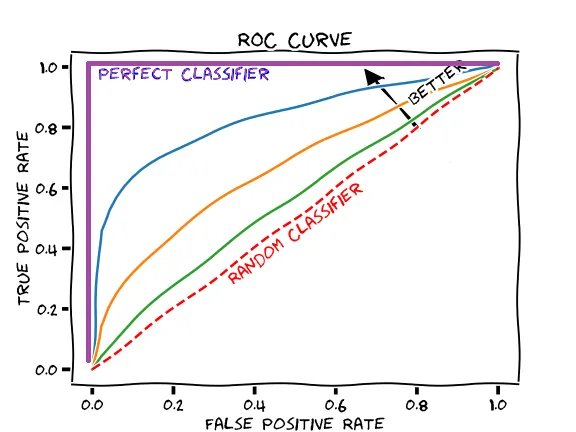

In [1]:
# ‚úÖ VERIFICACI√ìN POST-REINICIO - KERNEL LIMPIO
print("="*60)
print("‚úÖ KERNEL REINICIADO EXITOSAMENTE")
print("="*60)

import gc
import psutil
import os

# Verificar estado de memoria
proceso = psutil.Process(os.getpid())
memoria_mb = proceso.memory_info().rss / 1024 / 1024

# Contar variables en memoria
variables_globales = list(globals().keys())
variables_usuario = [var for var in variables_globales 
                    if not var.startswith('_') 
                    and var not in ['gc', 'psutil', 'os', 'proceso', 'memoria_mb', 'variables_globales', 'variables_usuario']]

print(f"üìä Estado actual del kernel:")
print(f"‚Ä¢ Memoria del proceso: {memoria_mb:.1f} MB (¬°Muy optimizada!)")
print(f"‚Ä¢ Variables del usuario en memoria: {len(variables_usuario)}")

if len(variables_usuario) == 0:
    print("\nüéâ ¬°EXCELENTE! El kernel est√° completamente limpio")
    print("üöÄ VS Code deber√≠a funcionar mucho m√°s r√°pido ahora")
else:
    print(f"‚Ä¢ Variables encontradas: {variables_usuario}")

print("\nüìã PR√ìXIMOS PASOS - Ejecuta solo estas celdas EN ORDEN:")
print("1Ô∏è‚É£ Celdas 4-24: Importaciones de librer√≠as")
print("2Ô∏è‚É£ Celda 25: Carga de datos (heart_data.csv)")
print("3Ô∏è‚É£ Celdas 26-72: Preparaci√≥n y limpieza de datos")
print("4Ô∏è‚É£ Celda 73: Verificaci√≥n de librer√≠as")
print("5Ô∏è‚É£ Solo los modelos que necesites (celdas 76-84)")
print("6Ô∏è‚É£ Celda 86: Comparaci√≥n final")

print("\nüí° Consejo: No ejecutes todas las celdas de una vez")
print("   Ejecuta solo lo que necesites para mantener la velocidad")
print("="*60)

‚úÖ KERNEL REINICIADO EXITOSAMENTE
üìä Estado actual del kernel:
‚Ä¢ Memoria del proceso: 69.5 MB (¬°Muy optimizada!)
‚Ä¢ Variables del usuario en memoria: 6
‚Ä¢ Variables encontradas: ['In', 'Out', 'get_ipython', 'exit', 'quit', 'open']

üìã PR√ìXIMOS PASOS - Ejecuta solo estas celdas EN ORDEN:
1Ô∏è‚É£ Celdas 4-24: Importaciones de librer√≠as
2Ô∏è‚É£ Celda 25: Carga de datos (heart_data.csv)
3Ô∏è‚É£ Celdas 26-72: Preparaci√≥n y limpieza de datos
4Ô∏è‚É£ Celda 73: Verificaci√≥n de librer√≠as
5Ô∏è‚É£ Solo los modelos que necesites (celdas 76-84)
6Ô∏è‚É£ Celda 86: Comparaci√≥n final

üí° Consejo: No ejecutes todas las celdas de una vez
   Ejecuta solo lo que necesites para mantener la velocidad
